# **P1. Networks Theory**
**Sansores Cruz Angel David\
Data Engineering\
Universidad Politécnica de Yucatán\
Ucú, Yucatán, México\
2109139@upy.edu.mx**

# **Instructions:**
1. Read completely this project assignment.
2. Choose a social network datasetyou are personally interested in. Here are some pages where you can find interesting network datasets1:
- a. Network Datasets used in Network Science (Barabasi, 2018): http://networksciencebook.com/translations/en/resources/data.html
- b. Pajek Datasets: http://vlado.fmf.uni-lj.si/pub/networks/data/
- c. Network Data Repository from the University of California: http://networkdata.ics.uci.edu/index.html
- d. Standford Large Network Dataset Collection: http://snap.stanford.edu/data/
- e. Network Data (Mark Newman): http://www-personal.umich.edu/~mejn/netdata/
- f. Konect, Networks: http://konect.uni-koblenz.de/networks/
- g. Network Data from Arizona State University: http://socialcomputing.asu.edu/pages/datasets
- h. 70 Online Datasets: https://www.technologyreview.com/s/421886/the-70-online-databases-that-define-our-planet/ \
**Do not choose small networks, e. g. Karate Club Network.**
3. Complete the following analysis:

# **Basic Information and Visualization for football.gml**

Graph with 115 nodes and 613 edges


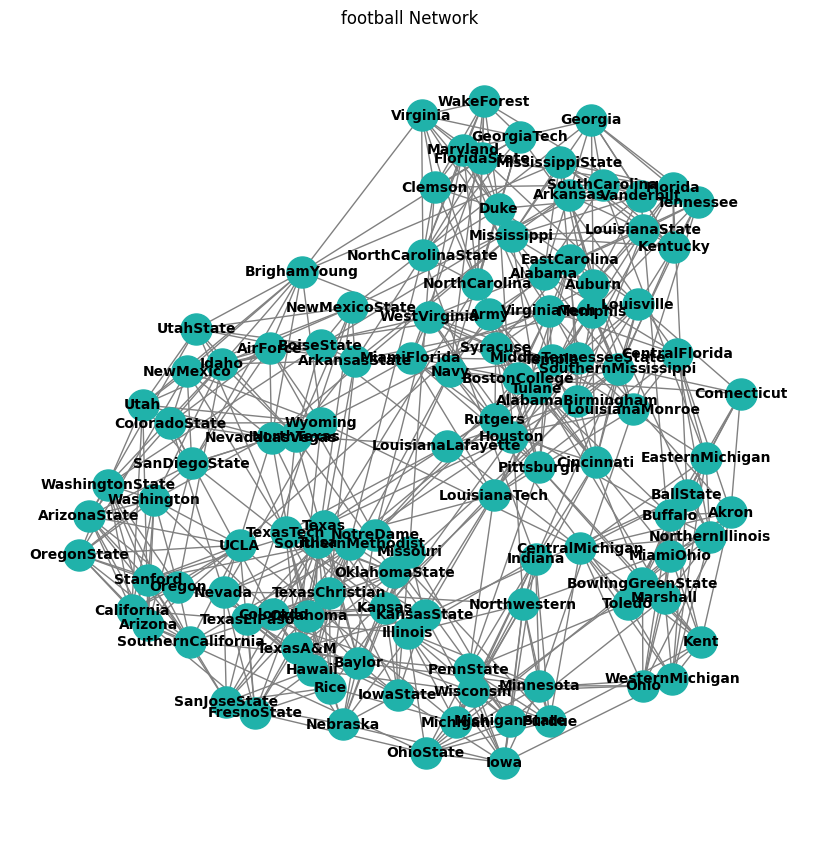

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the GML file
file_path = 'football.gml'
G = nx.read_gml(file_path)

# Basic information about the network
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
node_degrees = dict(G.degree())

# Display basic information
info = f"Graph with {num_nodes} nodes and {num_edges} edges"
print(info)

# Draw the network
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightseagreen', edge_color='gray', node_size=500, font_size=10, font_weight='bold')

# Display the plot
plt.title("football Network")
plt.show()

**Visualization of the football Network**

In [18]:
# Extracting basic information using updated methods
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
node_degrees = dict(G.degree())

# Summarizing the basic information
info_summary = {
    "Number of Nodes": num_nodes,
    "Number of Edges": num_edges,
    "Degree of Each Node": node_degrees
}

info_summary

{'Number of Nodes': 115,
 'Number of Edges': 613,
 'Degree of Each Node': {'BrighamYoung': 12,
  'FloridaState': 12,
  'Iowa': 12,
  'KansasState': 12,
  'NewMexico': 11,
  'TexasTech': 12,
  'PennState': 12,
  'SouthernCalifornia': 12,
  'ArizonaState': 11,
  'SanDiegoState': 11,
  'Baylor': 10,
  'NorthTexas': 10,
  'NorthernIllinois': 10,
  'Northwestern': 11,
  'WesternMichigan': 10,
  'Wisconsin': 12,
  'Wyoming': 11,
  'Auburn': 11,
  'Akron': 11,
  'VirginiaTech': 11,
  'Alabama': 11,
  'UCLA': 11,
  'Arizona': 11,
  'Utah': 11,
  'ArkansasState': 10,
  'NorthCarolinaState': 11,
  'BallState': 10,
  'Florida': 11,
  'BoiseState': 9,
  'BostonCollege': 11,
  'WestVirginia': 11,
  'BowlingGreenState': 11,
  'Michigan': 11,
  'Virginia': 10,
  'Buffalo': 11,
  'Syracuse': 11,
  'CentralFlorida': 8,
  'GeorgiaTech': 11,
  'CentralMichigan': 11,
  'Purdue': 11,
  'Colorado': 11,
  'ColoradoState': 10,
  'Connecticut': 7,
  'EasternMichigan': 11,
  'EastCarolina': 11,
  'Duke': 11,
  

**Football Network Characteristics**

Network Characteristics Summary:
Size of the Network: 115
Number of Links: 613
Average Path Length: 2.5081617086193746
Clustering Coefficient: 0.40321601104209814
Average Distance: 2.5081617086193746
Diameter: 4
Eccentricity:
  BrighamYoung: 3
  FloridaState: 4
  Iowa: 4
  KansasState: 3
  NewMexico: 4
  TexasTech: 4
  PennState: 3
  SouthernCalifornia: 4
  ArizonaState: 4
  SanDiegoState: 4
  Baylor: 4
  NorthTexas: 4
  NorthernIllinois: 4
  Northwestern: 3
  WesternMichigan: 4
  Wisconsin: 3
  Wyoming: 3
  Auburn: 3
  Akron: 4
  VirginiaTech: 4
  Alabama: 4
  UCLA: 4
  Arizona: 4
  Utah: 4
  ArkansasState: 4
  NorthCarolinaState: 4
  BallState: 4
  Florida: 4
  BoiseState: 3
  BostonCollege: 4
  WestVirginia: 4
  BowlingGreenState: 4
  Michigan: 4
  Virginia: 4
  Buffalo: 4
  Syracuse: 4
  CentralFlorida: 4
  GeorgiaTech: 4
  CentralMichigan: 4
  Purdue: 3
  Colorado: 4
  ColoradoState: 4
  Connecticut: 4
  EasternMichigan: 4
  EastCarolina: 4
  Duke: 4
  FresnoState: 4
  OhioState: 

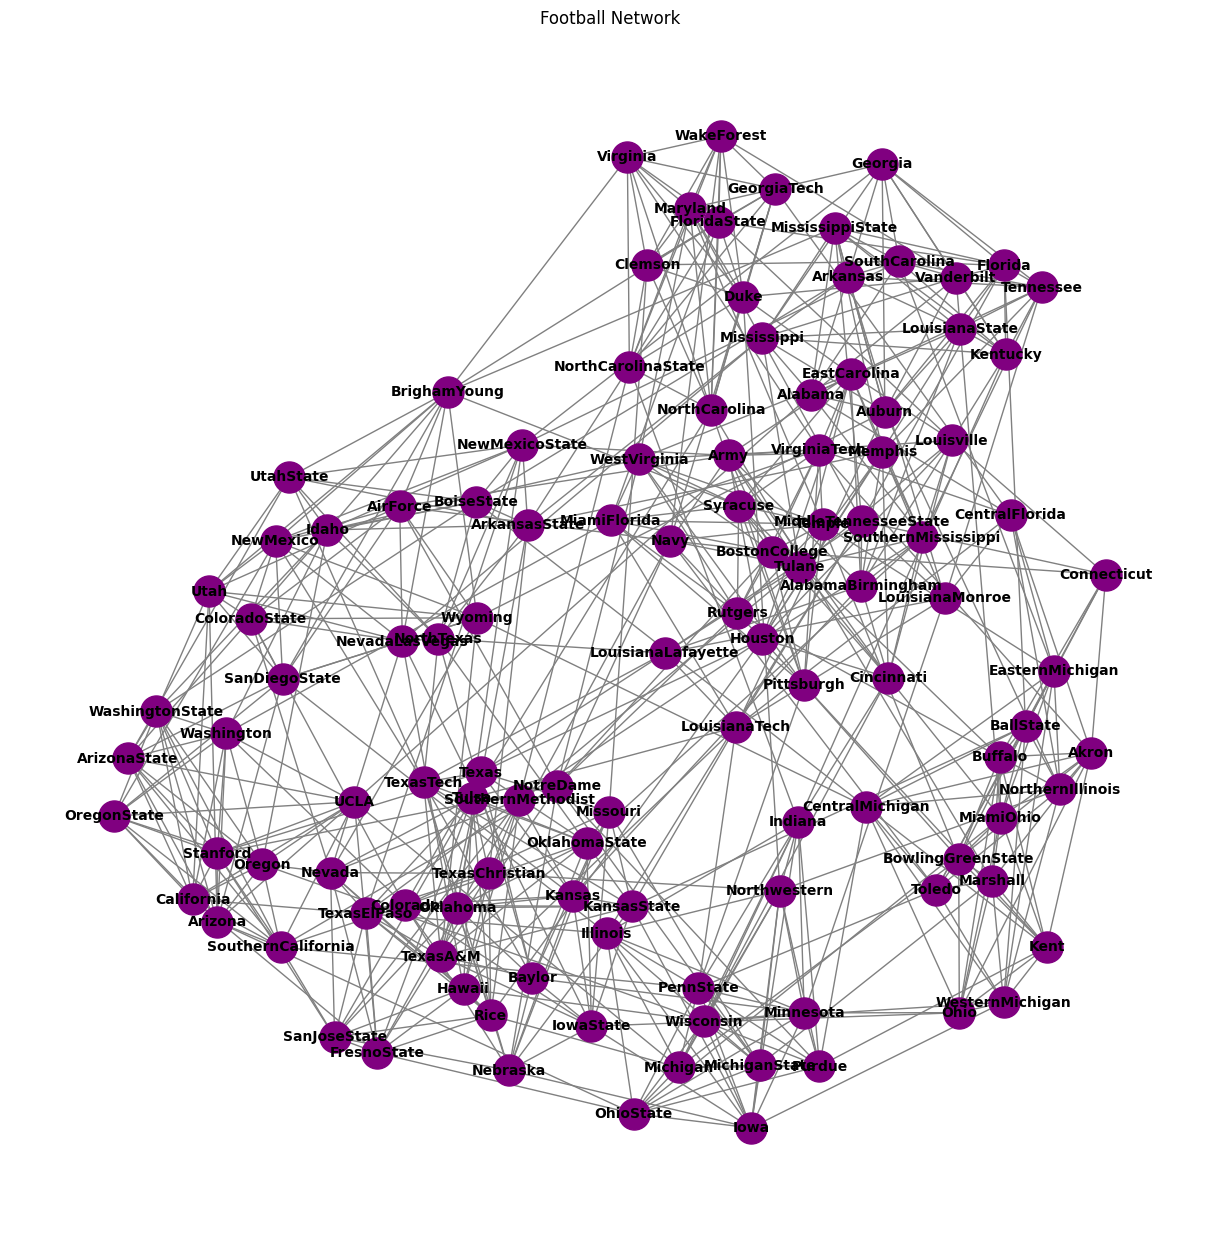

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the GML file
file_path = 'football.gml'
G = nx.read_gml(file_path)

# Calculating various network characteristics
size_of_network = G.number_of_nodes()
number_of_links = G.number_of_edges()
average_path_length = nx.average_shortest_path_length(G)
clustering_coefficient = nx.average_clustering(G)
average_distance = average_path_length  # Average distance is the same as average path length in this context
diameter = nx.diameter(G)
eccentricity = nx.eccentricity(G)
radius = nx.radius(G)
periphery = nx.periphery(G)
center = nx.center(G)

# Compiling the results into a summary
network_characteristics = {
    "Size of the Network": size_of_network,
    "Number of Links": number_of_links,
    "Average Path Length": average_path_length,
    "Clustering Coefficient": clustering_coefficient,
    "Average Distance": average_distance,
    "Diameter": diameter,
    "Eccentricity": eccentricity,
    "Radius": radius,
    "Periphery": periphery,
    "Center": center
}

# Display basic information
print("Network Characteristics Summary:")
for key, value in network_characteristics.items():
    if isinstance(value, dict):
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
    else:
        print(f"{key}: {value}")

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='purple', edge_color='gray', node_size=500, font_size=10, font_weight='bold')

# Display the plot
plt.title("Football Network")
plt.show()

# C. **Centrality Measure**
**Instruction:** Analyze the Network based on the Centrality Measures: Degree  Centrality, Eigenvector  Centrality, Katz  Centrality, Page  Rank, Betweenness  Centrality, Closeness  Centrality, Group  Centrality.  You  don’t need to calculate all of them, you need to choose the appropriate centrality measure  for  the  chosen  network  and  discuss  about it.  Include  any observation  that  you  consider  important  based  on  the T2.   Centrality Measures.

In [20]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Compile the results into a summary
centrality_measures = {
    "Degree Centrality": degree_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Closeness Centrality": closeness_centrality,
    "Eigenvector Centrality": eigenvector_centrality
}

# Create a dataframe for better visualization
import pandas as pd
centrality_df = pd.DataFrame(centrality_measures)
top_centrality_df = centrality_df.sort_values(by="Degree Centrality", ascending=False).head(10)

top_centrality_df

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
BrighamYoung,0.105263,0.032490,0.423792,0.106503
SouthernCalifornia,0.105263,0.014563,0.401408,0.120724
Nevada,0.105263,0.011810,0.401408,0.127683
Wisconsin,0.105263,0.020895,0.423792,0.116303
NevadaLasVegas,0.105263,0.018819,0.422222,0.113703
FloridaState,0.105263,0.017621,0.413043,0.096385
SouthernMethodist,0.105263,0.016561,0.411552,0.122577
Tulsa,0.105263,0.020079,0.430189,0.121289
PennState,0.105263,0.019681,0.425373,0.112856
TexasTech,0.105263,0.010661,0.383838,0.102272


**Centrality Measure visualization**

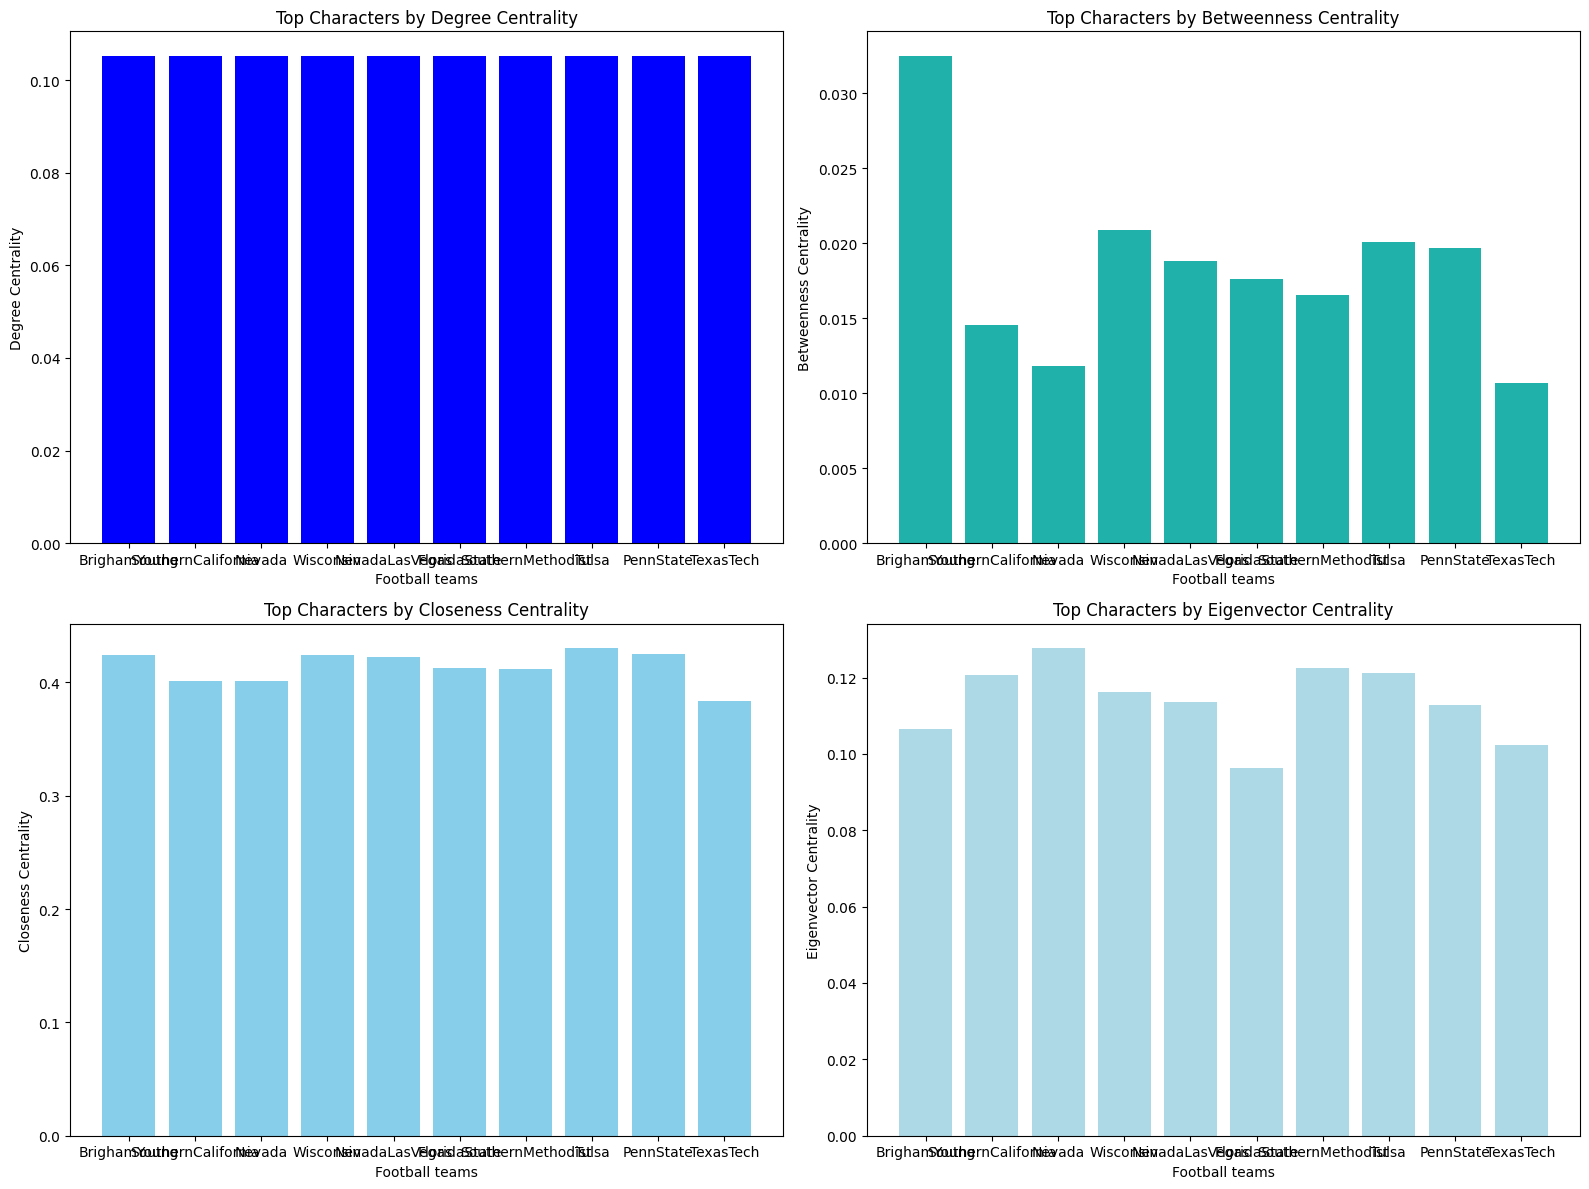

In [21]:
import matplotlib.pyplot as plt

# Crear una figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico de Degree Centrality
axs[0, 0].bar(top_centrality_df.index, top_centrality_df['Degree Centrality'], color='blue')
axs[0, 0].set_xlabel('Football teams')
axs[0, 0].set_ylabel('Degree Centrality')
axs[0, 0].set_title('Top Characters by Degree Centrality')

# Gráfico de Betweenness Centrality
axs[0, 1].bar(top_centrality_df.index, top_centrality_df['Betweenness Centrality'], color='lightseagreen')
axs[0, 1].set_xlabel('Football teams')
axs[0, 1].set_ylabel('Betweenness Centrality')
axs[0, 1].set_title('Top Characters by Betweenness Centrality')

# Gráfico de Closeness Centrality
axs[1, 0].bar(top_centrality_df.index, top_centrality_df['Closeness Centrality'], color='skyblue')
axs[1, 0].set_xlabel('Football teams')
axs[1, 0].set_ylabel('Closeness Centrality')
axs[1, 0].set_title('Top Characters by Closeness Centrality')

# Gráfico de Eigenvector Centrality
axs[1, 1].bar(top_centrality_df.index, top_centrality_df['Eigenvector Centrality'], color='lightblue')
axs[1, 1].set_xlabel('Football teams')
axs[1, 1].set_ylabel('Eigenvector Centrality')
axs[1, 1].set_title('Top Characters by Eigenvector Centrality')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# D. **Degree Distribution**
**Instruction:** Make a plot of the degree distribution of the chosen network.

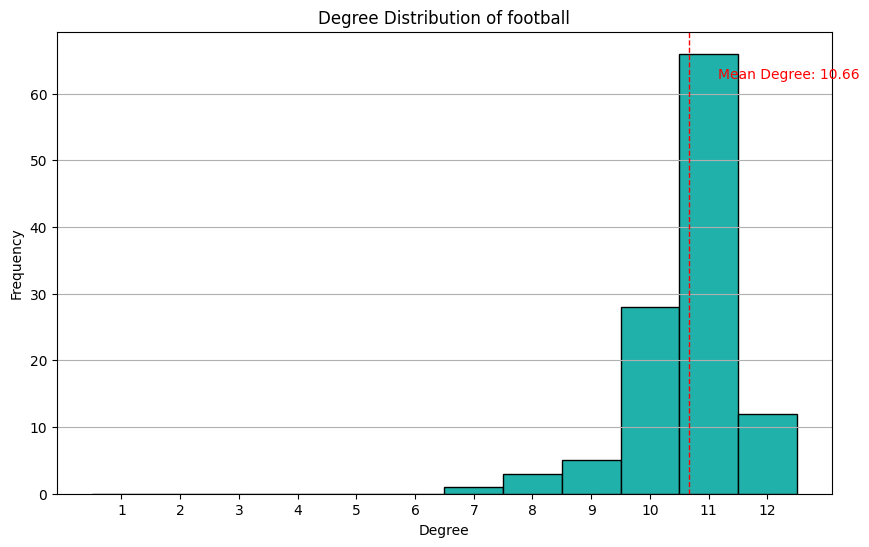

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the GML file
file_path = 'football.gml'  # Ensure this path is correct
G = nx.read_gml(file_path)

# Calculate the degree of each node
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=range(1, max(degree_sequence) + 2), edgecolor='black', align='left', color='lightseagreen')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of football')
plt.xticks(range(1, max(degree_sequence) + 1))
plt.grid(axis='y')

# Add mean degree line
mean_degree = sum(degree_sequence) / len(degree_sequence)
plt.axvline(mean_degree, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_degree + 0.5, plt.ylim()[1] * 0.9, f'Mean Degree: {mean_degree:.2f}', color='red')

# Display the plot
plt.show()

# E. **CommunityDetection**
**Instruction:** Apply a Community Analysis to the chosennetwork.Give a visualization of the communities. Include any observation that you consider important based on the T4. Community Detection.

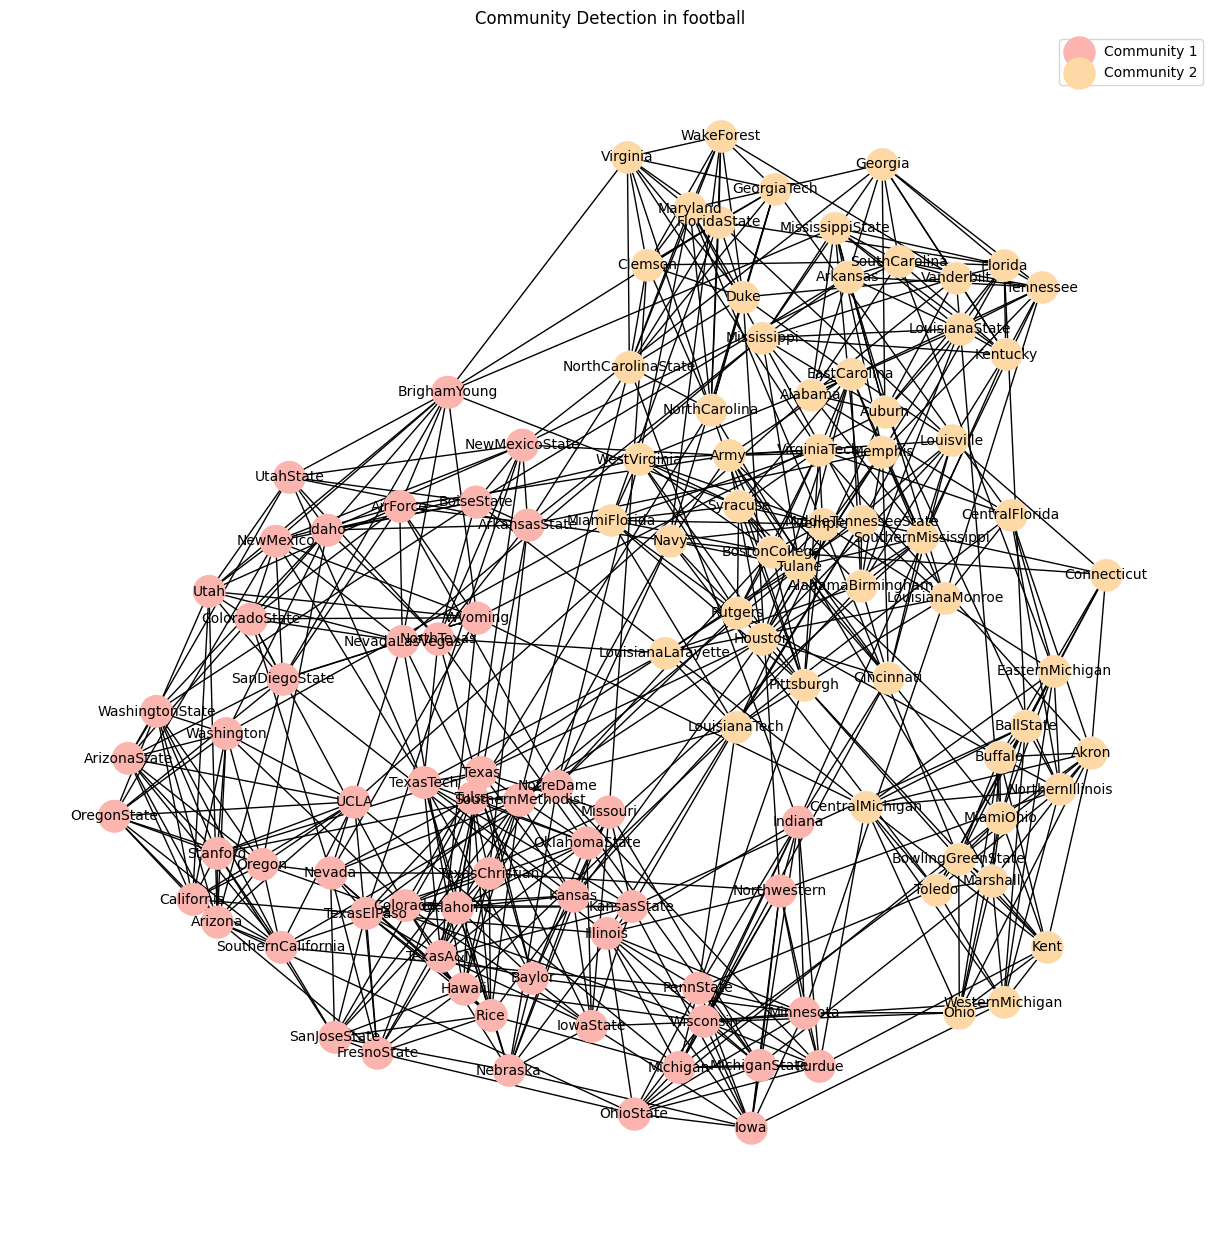

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Load the GML file
file_path = 'football.gml'  # Ensure this path is correct
G = nx.read_gml(file_path)

# Apply community detection using the Girvan-Newman method
comp = community.girvan_newman(G)
communities = next(comp)

# Assign colors to each community
community_map = {}
for i, com in enumerate(communities):
    for node in com:
        community_map[node] = i

colors = [community_map[node] for node in G.nodes]

# Draw the network with community colors
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=500, font_size=10, cmap=plt.cm.Pastel1)

# Highlight communities with different colors
for i, com in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=com, node_color=[plt.cm.Pastel1(i / len(communities))], label=f'Community {i + 1}', node_size=500)

plt.title("Community Detection in football")
plt.legend()
plt.show()